In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv('Heart_Disease.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
df.duplicated().sum()

np.int64(723)

In [15]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

np.int64(0)

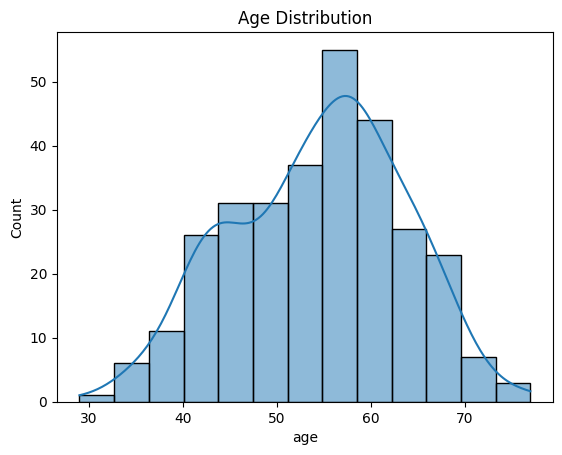

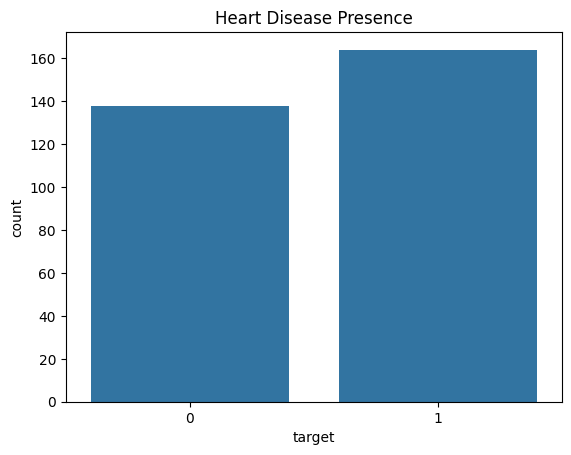

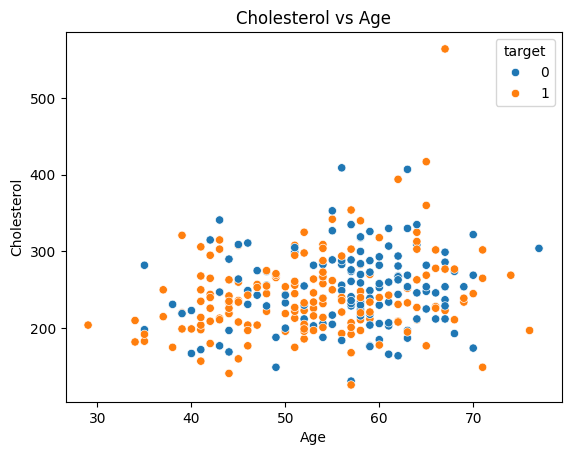

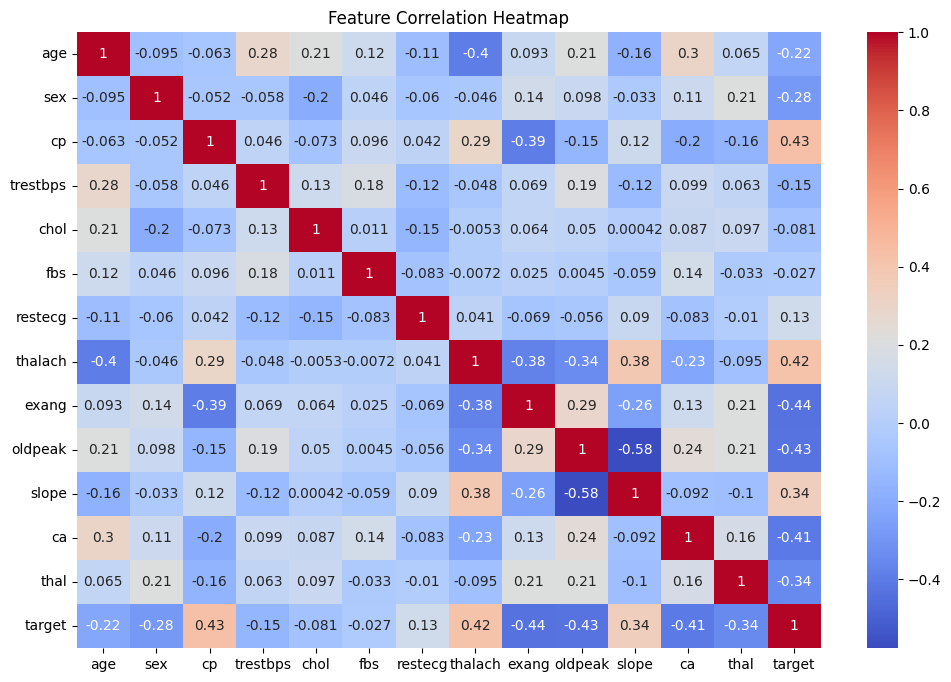

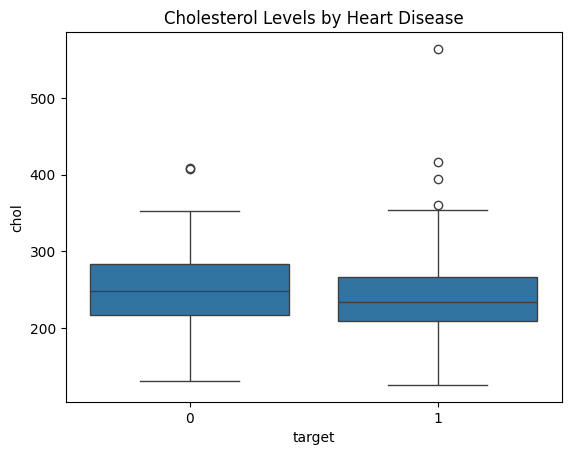

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of age
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Count plot for target
sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence")
plt.show()

# Cholestrol vs Age
sns.scatterplot(x='age', y='chol', hue='target', data=df)
plt.title("Cholesterol vs Age")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()


# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot of cholesterol by target
sns.boxplot(x='target', y='chol', data=df)
plt.title("Cholesterol Levels by Heart Disease")
plt.show()


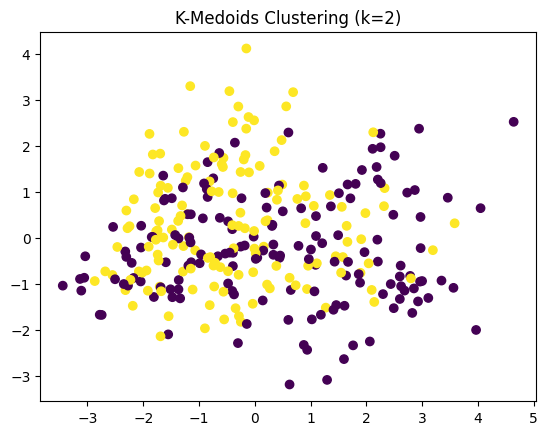

Adjusted Rand Index for k=2: 0.05371295621565297


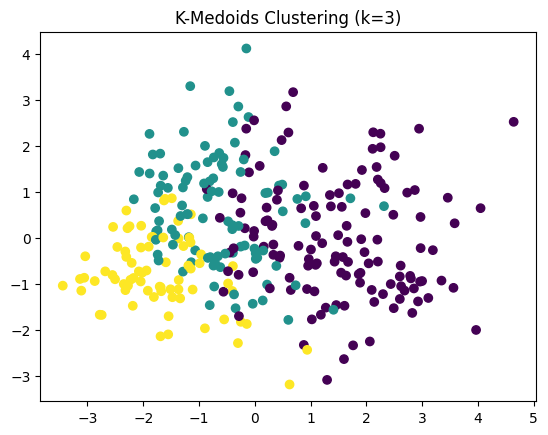

In [17]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preprocessing
X = df.drop('target', axis=1)  # Assuming 'target' is the label
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try k=2 and k=3
for k in [2, 3]:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    clusters = kmedoids.fit_predict(X_scaled);

    # Visualize clusters using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
    plt.title(f'K-Medoids Clustering (k={k})')
    plt.show()

      # Accuracy (only valid if clusters match labels)
    if k == len(set(y)):
        from sklearn.metrics import adjusted_rand_score
        print(f'Adjusted Rand Index for k={k}:', adjusted_rand_score(y, clusters))

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

for k in [2, 3]:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    clusters = kmedoids.fit_predict(X_scaled)

    unique_labels = set(clusters)
    print(f"\nk={k} → Unique clusters: {len(unique_labels)}")

    if len(unique_labels) > 1:
        sil_score = silhouette_score(X_scaled, clusters)
        db_index = davies_bouldin_score(X_scaled, clusters)
        print(f"Silhouette Score: {sil_score:.3f}")
        print(f"Davies-Bouldin Index: {db_index:.3f}")
    else:
        print("Only one cluster found — evaluation metrics not applicable.")



k=2 → Unique clusters: 2
Silhouette Score: 0.049
Davies-Bouldin Index: 4.156

k=3 → Unique clusters: 3
Silhouette Score: 0.069
Davies-Bouldin Index: 2.853
